In [2]:
from pathlib import Path
from environs import Env
import geopandas as gpd
import contextily

In [3]:
from streetscapes.sources import Mapillary
from streetscapes.streetview import SVWorkspace

In [4]:
env = Env()
env.read_env(".env")
city = "Amsterdam"

In [5]:
hf_path = Path(env.path("HF_HOME"), city)
ws = SVWorkspace(hf_path)
mp = Mapillary(ws.env, root_dir=hf_path)
mp

Mapillary(root_dir='/gpfs/work4/0/prjs0914/streetscapes/Amsterdam')

In [19]:
import glob
import json
import pandas as pd
from pandas import json_normalize
import numpy as np

image_ids = glob.glob("./image_ids/bbox*.json")
dfs = []
for f in image_ids:
    with open(f, 'r') as file:
        data = json.load(file)
    df = json_normalize(data)
    if "computed_geometry.coordinates" in df.columns and not isinstance(df["computed_geometry.coordinates"][0], float) :
        df['lon'] = [x[0] for x in df['geometry.coordinates']]
        df['lat'] = [x[1] for x in df['geometry.coordinates']]
        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
        gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
        dfs.append(gdf)


In [20]:
df['lon']

0      4.907637
1      4.903041
2      4.909773
3      4.904777
4      4.902228
         ...   
134    4.906211
135    4.904106
136    4.903398
137    4.901623
138    4.904197
Name: lon, Length: 139, dtype: float64

KeyboardInterrupt: 

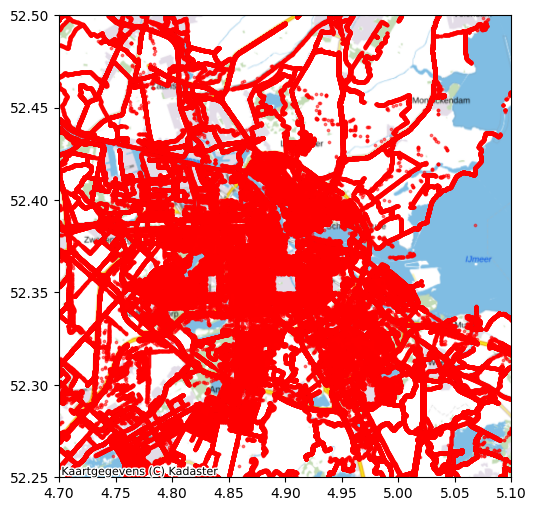

In [26]:
ax = dfs[0].plot(color="red", markersize=3, figsize=(6, 6), alpha=0.5)

ax.set_xlim(4.7,5.1)
ax.set_ylim(52.25,52.5)

contextily.add_basemap(ax, crs=gdf.crs, source=contextily.providers.nlmaps.standaard)

for gdf in dfs:
    gdf.plot(ax=ax, color="red", markersize=3, alpha=0.5)
